Calculation of number of $\nu_\mu$ CC interactions expected in the ATLAS Tile Cal (part of Hcal) from high energy supernova neutrinos

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import nuflux
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import imageio
import uproot
import itertools
import SNeATLAS
%matplotlib inline

### Cross section

Obtained from Alfonso. Given only as $\nu_\mu, \overline{\nu}_\mu \rightarrow p , n $. So to get the CS on something like iron, we multiply the number of nucleons by the appropriate atomic number/mass number (as a rough estimate). No high energy cross sections are currently available taking into account entire nuclei. 

### Flux

Flux given as 

$$\Phi = \frac{dN}{dE dA dt}$$

where $\sigma$ is the $\nu_\mu \rightarrow Fe56$ CC cross-section. so the total differential number of events is 

$$dN = \Phi(E) d\sigma dt dE \times (\text{iron atoms in detector})$$

and since the flux has a time dependence (supernova)

$$N = \int_E \Phi(E,t) \sigma(E) dE \times dt (\text{# Fe atoms in Hcal}) $$

For our astrophysical case, the flux is given from Murase [here](https://github.com/pegasuskmurase/ModelTemplates). It is in terms of total neutrino number, so it includes (1,1,1) flavor ratio. *Find out if this is physically the case!*


In [3]:
# assumed astronomical input parameters: 
flavor_ratio = [1,1,1]
energy_range = [500,1e7] # in GeV: Murase22 uses 500 GeV to 1 PeV
s_index = 2.0 # cosmic ray index
D_st = 1e-2 # normalized Dstar parameter

galaxy_dist = 3.086e22 # 10 kpc in cm

# neutrino mixing parameters
theta_12 = 0.563942
theta_13 = 0.154085
theta_23 = 0.785398
delta_m2_12 = 7.65e-05
delta_m2_13 = delta_m2_23 = 0.00247
deltaCP = 0.0

hbar = 6.582e-16 
c_light = 3e8

### Little animation for fun

In [10]:
def animate(i):
    #==========================#
    df_time_slice = SN_fluxes.loc[SN_fluxes['k']==i]
    time = np.asarray(df_time_slice['time'])[0]
    energy_array = df_time_slice['Energy'] / 1e9
    d_neutrino_lumi = np.asarray(df_time_slice['Energy']) / 1e9 *\
                      np.asarray(df_time_slice['Energy']) / 1e9 *\
                      np.asarray(df_time_slice['dN_neutrino_dE'])*1e9 *\
                      np.asarray(df_time_slice['CR_isallowed'])

    plt.rcParams['text.usetex'] = True
    fig = plt.figure(figsize=(7, 3), dpi=200)
    plt.plot(energy_array, d_neutrino_lumi)
    plt.xscale('log')
    plt.xlabel('Energy (GeV)')
    plt.ylabel(r'$\frac{dN_\nu}{dE} E^2$ (GeV/s)')
    plt.xlim(1e-4, 1e8)
    plt.ylim(0,3.3e42)

    plt.title(' = '.join(['time', str(time) + ' s']))
    #==========================#
    
    plt.savefig(f'./img/img_{i}.png', bbox_inches='tight')

In [11]:
plt.rcParams['text.usetex'] = True
for i in range(51):
    animate(i)
    
frames = []
for i in range(51):
    image = imageio.v2.imread(f'./img/img_{i}.png')
    frames.append(image)
    
imageio.mimsave('./img/example.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second

NameError: name 'SN_fluxes' is not defined

## Event rate binned in energy

In [4]:
energyaxis = np.logspace(np.log10(100), np.log10(1e7), num=50)

event_hist_2P_D0_01_s20 = np.zeros(len(energyaxis)-1)
event_hist_2P_D0_1_s20 = np.zeros(len(energyaxis)-1)
event_hist_2P_D1_0_s20 = np.zeros(len(energyaxis)-1)
event_hist_2P_D0_01_s22 = np.zeros(len(energyaxis)-1)
event_hist_2P_D0_1_s22 = np.zeros(len(energyaxis)-1)
event_hist_2P_D1_0_s22 = np.zeros(len(energyaxis)-1)

event_hist_2n_D0_01_s20 = np.zeros(len(energyaxis)-1)
event_hist_2n_D0_1_s20 = np.zeros(len(energyaxis)-1)
event_hist_2n_D1_0_s20 = np.zeros(len(energyaxis)-1)
event_hist_2n_D0_01_s22 = np.zeros(len(energyaxis)-1)
event_hist_2n_D0_1_s22 = np.zeros(len(energyaxis)-1)
event_hist_2n_D1_0_s22 = np.zeros(len(energyaxis)-1)

#event_hist_2n_D0_1 = np.zeros(len(energyaxis)-1)

SNe_2P_D0_01_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs20.dat')
SNe_2P_D0_1_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs20.dat')
SNe_2P_D1_0_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD1_0Rw1e15/FinalFluxs20.dat')
SNe_2P_D0_01_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs22.dat')
SNe_2P_D0_1_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs22.dat')
SNe_2P_D1_0_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD1_0Rw1e15/FinalFluxs22.dat')

SNe_2n_D1_0_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs20.dat')
SNe_2n_D0_1_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_1/FinalFluxs20.dat')
SNe_2n_D0_01_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_01/FinalFluxs20.dat')
SNe_2n_D1_0_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs22.dat')
SNe_2n_D0_1_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_1/FinalFluxs22.dat')
SNe_2n_D0_01_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_01/FinalFluxs22.dat')

for i in range(len(energyaxis)-1): 
    event_hist_2P_D0_01_s20[i] = SNe_2P_D0_01_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D0_1_s20[i] = SNe_2P_D0_1_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D1_0_s20[i] = SNe_2P_D1_0_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D0_01_s22[i] = SNe_2P_D0_01_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D0_1_s22[i] = SNe_2P_D0_1_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D1_0_s22[i] = SNe_2P_D1_0_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    
    event_hist_2n_D0_01_s20[i] = SNe_2n_D0_01_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D0_1_s20[i] = SNe_2n_D0_1_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D1_0_s20[i] = SNe_2n_D1_0_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D0_01_s22[i] = SNe_2n_D0_01_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D0_1_s22[i] = SNe_2n_D0_1_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D1_0_s22[i] = SNe_2n_D1_0_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])

/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNe

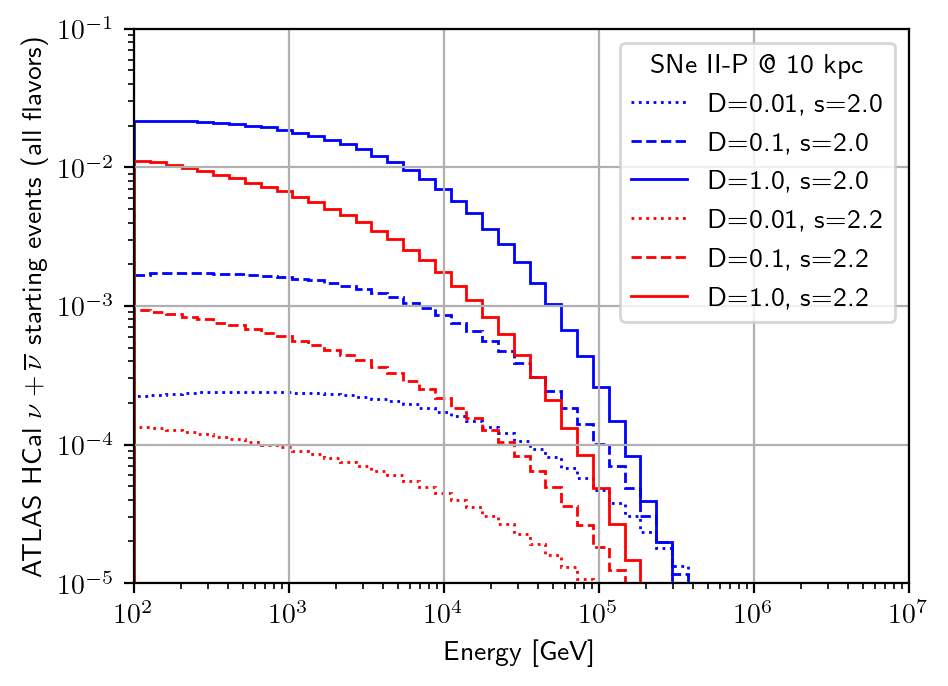

In [10]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.stairs(event_hist_2P_D0_01_s20, energyaxis, label='D=0.01, s=2.0', color='blue', linestyle=':')
plt.stairs(event_hist_2P_D0_1_s20, energyaxis, label='D=0.1, s=2.0', color='blue', linestyle='--')
plt.stairs(event_hist_2P_D1_0_s20, energyaxis, label='D=1.0, s=2.0', color='blue')

plt.stairs(event_hist_2P_D0_01_s22, energyaxis, label='D=0.01, s=2.2', color='red', linestyle=':')
plt.stairs(event_hist_2P_D0_1_s22, energyaxis, label='D=0.1, s=2.2', color='red', linestyle='--')
plt.stairs(event_hist_2P_D1_0_s22, energyaxis, label='D=1.0, s=2.2', color='red')
#plt.stairs(event_hist_2n_D0_1, energyaxis, label='SNe IIn D=0.1', color='red', linestyle=':')

plt.xscale('log'); plt.xlim(100,1e7)
plt.yscale('log'); plt.ylim(1e-5, 1e-1)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'ATLAS HCal $\nu + \overline{\nu}$ starting events (all flavors)')
plt.legend(loc='upper right', title='SNe II-P @ 10 kpc')
plt.grid()

### Export fluxes for a particular SNe case (e.g. for throughgoing events calculation)

In [143]:
event_hist_2P_D0_1_s20
energyaxis_centerbin = 0.5*(np.log10(energyaxis[1:]) + np.log10(energyaxis[:-1]))
energyaxis_centerbin = 10**energyaxis_centerbin
combined = np.asarray([energyaxis_centerbin, event_hist_2P_D0_1_s20])
combined = combined.T
#np.savetxt('flux_2P_D0_1_s20.txt', combined)

array([1.68476064e-03, 1.71605690e-03, 1.71639892e-03, 1.72278835e-03,
       1.72808866e-03, 1.70329282e-03, 1.70478816e-03, 1.67157687e-03,
       1.64827377e-03, 1.62019411e-03, 1.56396318e-03, 1.52868672e-03,
       1.45990320e-03, 1.39981501e-03, 1.32883745e-03, 1.23916308e-03,
       1.16117294e-03, 1.05689452e-03, 9.64894064e-04, 8.62127352e-04,
       7.57816995e-04, 6.62888279e-04, 5.57979185e-04, 4.72704562e-04,
       3.85409048e-04, 3.09440771e-04, 2.45429642e-04, 1.84181310e-04,
       1.40112230e-04, 1.00129225e-04, 7.03598342e-05, 4.84960833e-05,
       3.06042021e-05, 1.98285948e-05, 1.15890977e-05, 6.62225211e-06,
       3.66360836e-06, 1.74547176e-06, 8.76558373e-07, 3.65861257e-07,
       1.48033187e-07, 5.65954917e-08, 1.63556383e-08, 5.31561484e-09,
       1.18971268e-09, 2.51856105e-10, 5.03210171e-11, 4.88309500e-12,
       6.73514881e-13])

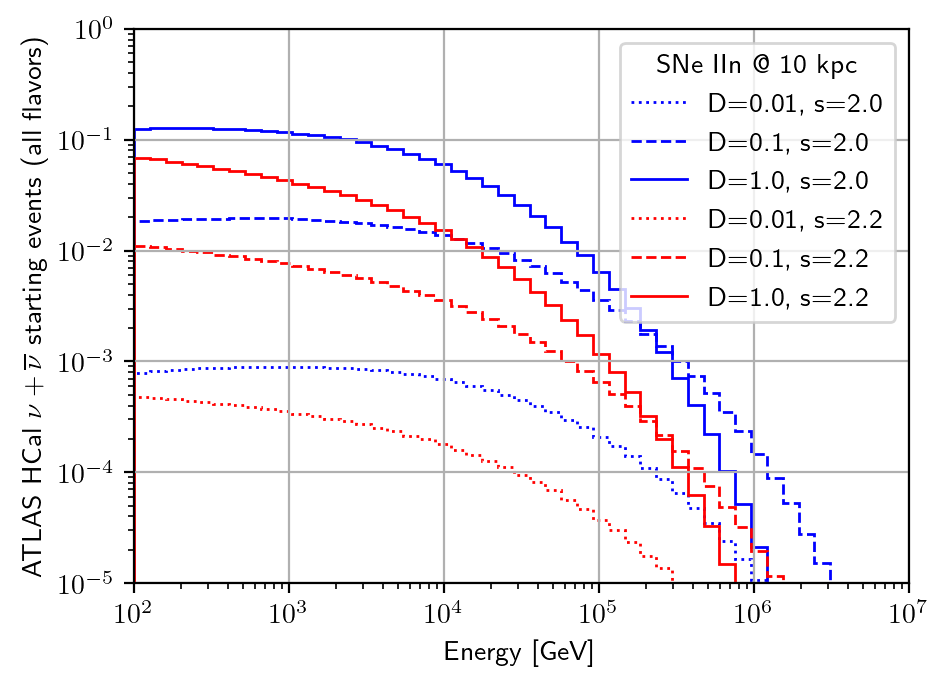

In [105]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.stairs(event_hist_2n_D0_01_s20, energyaxis, label='D=0.01, s=2.0', color='blue', linestyle=':')
plt.stairs(event_hist_2n_D0_1_s20, energyaxis, label='D=0.1, s=2.0', color='blue', linestyle='--')
plt.stairs(event_hist_2n_D1_0_s20, energyaxis, label='D=1.0, s=2.0', color='blue')

plt.stairs(event_hist_2n_D0_01_s22, energyaxis, label='D=0.01, s=2.2', color='red', linestyle=':')
plt.stairs(event_hist_2n_D0_1_s22, energyaxis, label='D=0.1, s=2.2', color='red', linestyle='--')
plt.stairs(event_hist_2n_D1_0_s22, energyaxis, label='D=1.0, s=2.2', color='red')
#plt.stairs(event_hist_2n_D0_1, energyaxis, label='SNe IIn D=0.1', color='red', linestyle=':')

plt.xscale('log'); plt.xlim(100,1e7)
plt.yscale('log'); plt.ylim(1e-5, 1e0)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'ATLAS HCal $\nu + \overline{\nu}$ starting events (all flavors)')
plt.legend(loc='upper right', title='SNe IIn @ 10 kpc')
plt.grid()

In [106]:
print('SNe 2P D=0.01 s=2.0: '+str(sum(event_hist_2P_D0_01_s20)))
print('SNe 2P D=0.1 s=2.0: '+str(sum(event_hist_2P_D0_1_s20)))
print('SNe 2P D=1.0 s=2.0: '+str(sum(event_hist_2P_D1_0_s20)))
print('SNe 2P D=0.01 s=2.2: '+str(sum(event_hist_2P_D0_01_s22)))
print('SNe 2P D=0.1 s=2.2: '+str(sum(event_hist_2P_D0_1_s22)))
print('SNe 2P D=1.0 s=2.2: '+str(sum(event_hist_2P_D1_0_s22)))

print('SNe 2n D=0.01 s=2.0: '+str(sum(event_hist_2n_D0_01_s20)))
print('SNe 2n D=0.1 s=2.0: '+str(sum(event_hist_2n_D0_1_s20)))
print('SNe 2n D=1.0 s=2.0: '+str(sum(event_hist_2n_D1_0_s20)))
print('SNe 2n D=0.01 s=2.2: '+str(sum(event_hist_2n_D0_01_s22)))
print('SNe 2n D=0.1 s=2.2: '+str(sum(event_hist_2n_D0_1_s22)))
print('SNe 2n D=1.0 s=2.2: '+str(sum(event_hist_2n_D1_0_s22)))

SNe 2P D=0.01 s=2.0: 0.005642484870435204
SNe 2P D=0.1 s=2.0: 0.03349214732418894
SNe 2P D=1.0 s=2.0: 0.3568678264962896
SNe 2P D=0.01 s=2.2: 0.002076981042064998
SNe 2P D=0.1 s=2.2: 0.012487687493001925
SNe 2P D=1.0 s=2.2: 0.13396252958458804
SNe 2n D=0.01 s=2.0: 0.021794550171743744
SNe 2n D=0.1 s=2.0: 0.4530145526691714
SNe 2n D=1.0 s=2.0: 2.4054398274656226
SNe 2n D=0.01 s=2.2: 0.007842010971544444
SNe 2n D=0.1 s=2.2: 0.16717598343596968
SNe 2n D=1.0 s=2.2: 0.8975585970329831


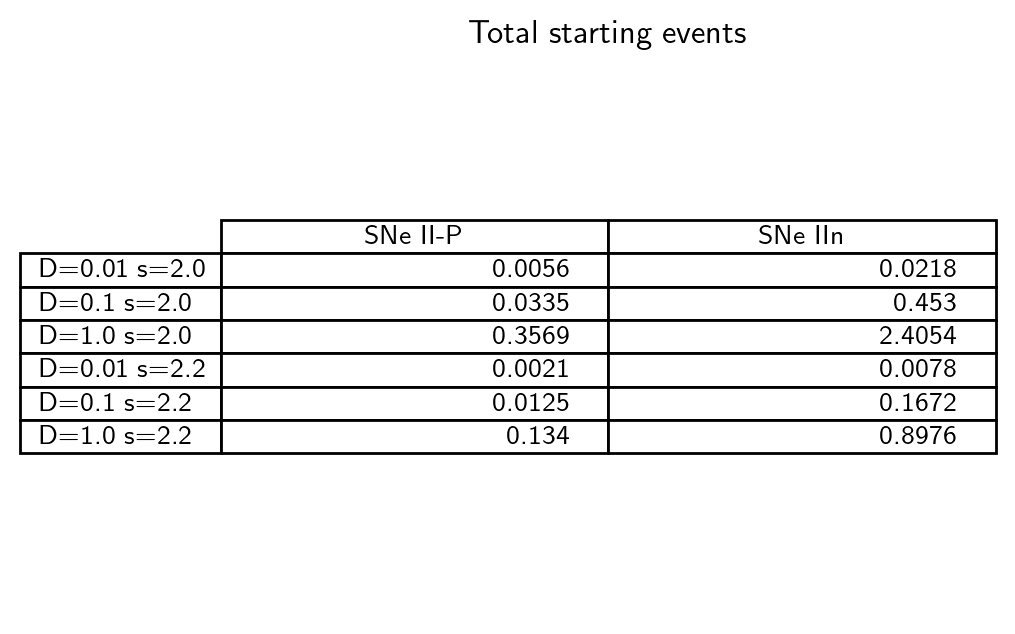

In [107]:
fig, ax = plt.subplots(figsize=(5, 3.6), dpi=200)
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

values = [ [sum(event_hist_2P_D0_01_s20), sum(event_hist_2n_D0_01_s20)],
           [sum(event_hist_2P_D0_1_s20), sum(event_hist_2n_D0_1_s20)],
           [sum(event_hist_2P_D1_0_s20), sum(event_hist_2n_D1_0_s20)],
           [sum(event_hist_2P_D0_01_s22), sum(event_hist_2n_D0_01_s22)], 
           [sum(event_hist_2P_D0_1_s22), sum(event_hist_2n_D0_1_s22)],
           [sum(event_hist_2P_D1_0_s22), sum(event_hist_2n_D1_0_s22)]]
values= np.round(values, 4)

row_labels = [ 'D=0.01 s=2.0', 'D=0.1 s=2.0', 'D=1.0 s=2.0', 'D=0.01 s=2.2', 'D=0.1 s=2.2', 'D=1.0 s=2.2' ]

ax.table(cellText = values, colLabels=['SNe II-P', 'SNe IIn'], rowLabels =row_labels, loc='center', fontsize=14)
ax.set_title('Total starting events')
#fig.tight_layout()

plt.show()

In [15]:
cm_in_kpc = 3.086e19 * (100)

distance_array = np.arange(0.001, 25, 0.2) # in kpc
counts_2n_D0_01 = np.asarray([]); counts_2n_D0_1 = np.asarray([]); counts_2n_D1_0 = np.asarray([])
counts_2P_D0_01 = np.asarray([]); counts_2P_D0_1 = np.asarray([]); counts_2P_D1_0 = np.asarray([])

SNe_2n_D1_0_s20_test = make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs20.dat')
SNe_2P_D0_1_s20_test = make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs20.dat')

SNe_2n_D0_1_s20_test = make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/IInD0_1/FinalFluxs20.dat')
SNe_2n_D0_01_s20_test = make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/IInD0_01/FinalFluxs20.dat')

SNe_2P_D0_01_s20_test = make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs20.dat')
SNe_2P_D1_0_s20_test = make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/II-PD1_0Rw1e15/FinalFluxs20.dat')

for dist in distance_array: 
    print(dist, end="\r", flush=True)
    val2n_D1_0 = SNe_2n_D1_0_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7]) # feed in distance in cm
    val2n_D0_1 = SNe_2n_D0_1_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    val2n_D0_01 = SNe_2n_D0_01_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    
    val2P_D0_1 = SNe_2P_D0_1_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    val2P_D0_01 = SNe_2P_D0_01_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    val2P_D1_0 = SNe_2P_D1_0_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    
    counts_2n_D0_01 = np.append(counts_2n_D0_01, val2n_D0_01)
    counts_2n_D0_1 = np.append(counts_2n_D0_1, val2n_D0_1)
    counts_2n_D1_0 = np.append(counts_2n_D1_0, val2n_D1_0)
    
    counts_2P_D0_01 = np.append(counts_2P_D0_01, val2P_D0_01)
    counts_2P_D0_1 = np.append(counts_2P_D0_1, val2P_D0_1)
    counts_2P_D1_0 = np.append(counts_2P_D1_0, val2P_D1_0)

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_907/613128352.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_907/613128352.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_907/613128352.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/var/folders/f7/1w1

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_907/613128352.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)


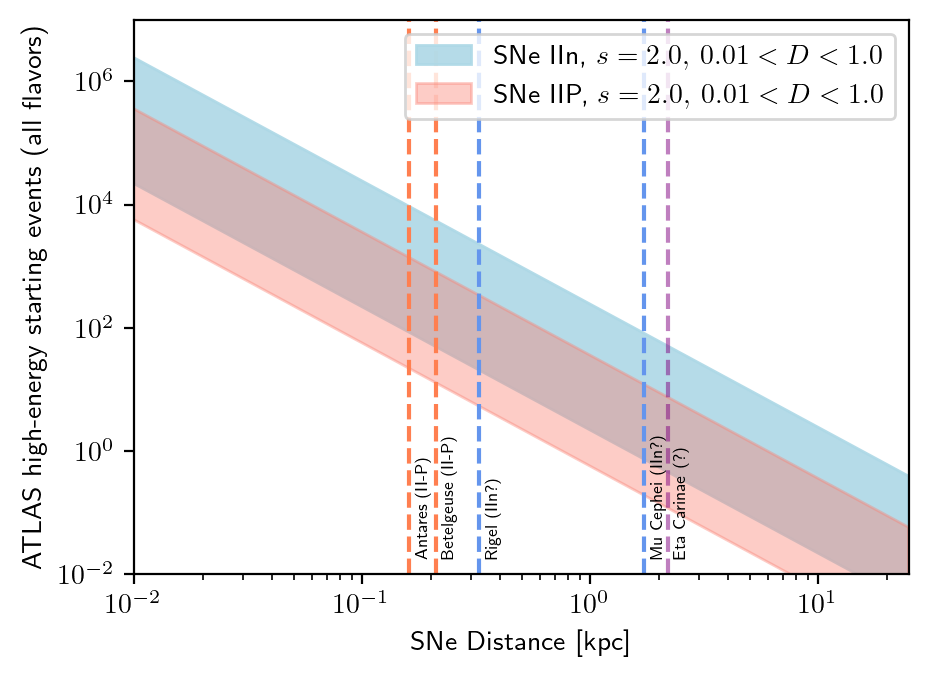

In [28]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

#plt.plot(distance_array, counts_2n, label='SNe IIn D=1.0, s=2.0')
#plt.plot(distance_array, counts_2P, label='SNe II-P D=0.1, s=2.0')

plt.fill_between(distance_array, counts_2n_D0_01, counts_2n_D1_0, alpha=0.9, label=r'SNe IIn, $s=2.0, \: 0.01<D<1.0$', color='lightblue')
plt.fill_between(distance_array, counts_2P_D0_01, counts_2P_D1_0, alpha=0.4, label=r'SNe IIP, $s=2.0, \: 0.01<D<1.0$', color='salmon')
#plt.plot(distance_array,counts_2n_D0_01)

kpc_ly = 1/3261.564

plt.axvline(550*kpc_ly*0.95, linestyle='--', color='coral')
plt.text(550*kpc_ly,2e-2,'Antares (II-P)',rotation=90, fontsize=6)

plt.axvline(720*kpc_ly*0.95, linestyle='--', color='coral')
plt.text(720*kpc_ly,2e-2,'Betelgeuse (II-P)',rotation=90 , fontsize=6)

plt.axvline(1118*kpc_ly*0.95, linestyle='--', color='cornflowerblue')
plt.text(1118*kpc_ly,2e-2,'Rigel (IIn?)',rotation=90 , fontsize=6)

plt.axvline(5900*kpc_ly*0.95, linestyle='--', color='cornflowerblue')
plt.text(5900*kpc_ly,2e-2,'Mu Cephei (IIn?)',rotation=90 , fontsize=6)

plt.axvline(7500*kpc_ly*0.95, linestyle='--', color='purple', alpha=0.5)
plt.text(7500*kpc_ly,2e-2,'Eta Carinae (?)',rotation=90 , fontsize=6)

plt.xscale('log'); plt.xlim(1e-2,25)
plt.yscale('log'); plt.ylim(1e-2, 1e7)
plt.xlabel('SNe Distance [kpc]')
plt.ylabel('ATLAS high-energy starting events (all flavors)')
plt.legend(loc='upper right')
#plt.grid()
plt.savefig('dist.pdf', dpi=300, bbox_inches="tight")

## Some additional plots

In [185]:
SNe = SNe_2P_D0_1_s20

TILumi_S = SNe.get_timeIntegrated_dN_neutrino_dE()
TIdN = SNe.get_timeIntegrated_dN_neutrino_dE()

energy_array = SNe.Energy_array[0]

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_4331/613128352.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)


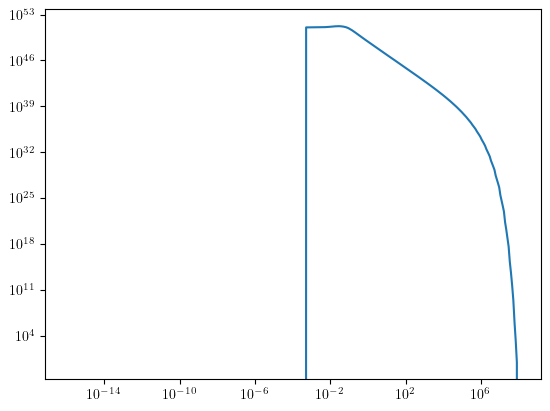

In [188]:
plt.plot(energy_array, TIdN)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e1, 2e5)

In [175]:
#fluxfile = np.asarray([energy_array, TIdN]).T
#np.savetxt("flux_2P_D0_1_s20.txt", fluxfile, delimiter=" ")

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_4331/73831606.py:86: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  = sp.integrate.quad(self.get_dLumi_neutrino_dE_atEnergy, time_axis[0], time_axis[-1], args=(energy_index,),limit=10000)[0]


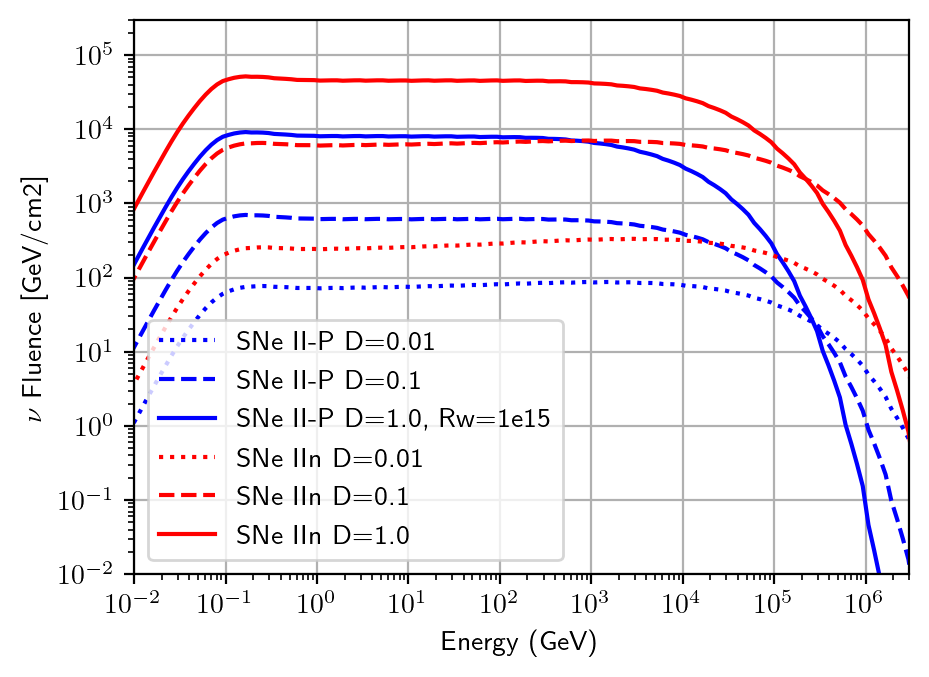

In [115]:
plt.rcParams.update({"text.usetex": True})

fig = plt.figure(figsize=(5, 3.6), dpi=200)
plt.plot(energy_array, SNe_2P_D0_01_s20.get_timeIntegrated_dLumi_neutrino_dE() / (4*np.pi* (galaxy_dist)**2 ) , label='SNe II-P D=0.01', color='blue', linestyle=':') #factor of 100 to convert m to cm
plt.plot(energy_array, SNe_2P_D0_1_s20.get_timeIntegrated_dLumi_neutrino_dE() / (4*np.pi* (galaxy_dist)**2 ) , label='SNe II-P D=0.1', color='blue', linestyle='--') 
plt.plot(energy_array, SNe_2P_D1_0_s20.get_timeIntegrated_dLumi_neutrino_dE() / (4*np.pi* (galaxy_dist)**2 ) , label='SNe II-P D=1.0, Rw=1e15', color='blue')

plt.plot(energy_array, SNe_2n_D0_01_s20.get_timeIntegrated_dLumi_neutrino_dE() / (4*np.pi* (galaxy_dist )**2 ) , label='SNe IIn D=0.01', color='red',linestyle=':')
plt.plot(energy_array, SNe_2n_D0_1_s20.get_timeIntegrated_dLumi_neutrino_dE() / (4*np.pi* (galaxy_dist )**2 ) , label='SNe IIn D=0.1', color='red',linestyle='--')
plt.plot(energy_array, SNe_2n_D1_0_s20.get_timeIntegrated_dLumi_neutrino_dE() / (4*np.pi* (galaxy_dist )**2 ) , label='SNe IIn D=1.0', color='red')


plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 3e6)
plt.ylim(1e-2, 3e5)
plt.legend(loc='lower left')
plt.xlabel('Energy (GeV)')
#plt.ylabel(r'$\nu_\mu$ Flux (GeV/cm2)')
plt.ylabel(r'$\nu$ Fluence [GeV/cm2]')

plt.grid()

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_1866/613128352.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)


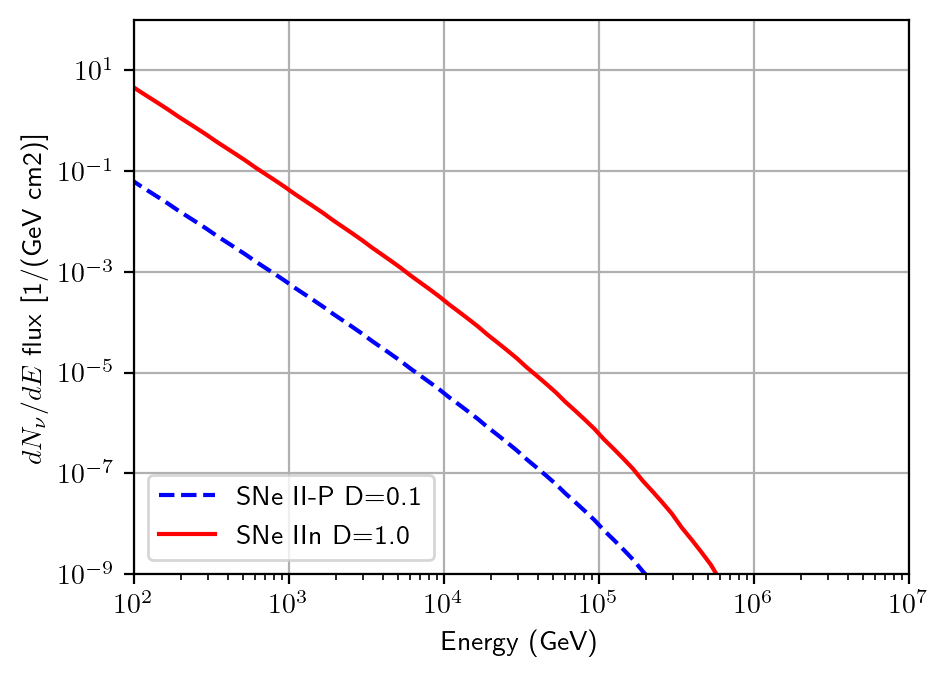

In [135]:
plt.rcParams.update({"text.usetex": True})

fig = plt.figure(figsize=(5, 3.6), dpi=200)
#plt.plot(energy_array, SNe_2P_D0_01_s20.get_timeIntegrated_dN_neutrino_dE() / (4*np.pi* (galaxy_dist *100)**2 ) , label='SNe II-P D=0.01', color='blue', linestyle=':') #factor of 100 to convert m to cm
plt.plot(energy_array, SNe_2P_D0_1_s20.get_timeIntegrated_dN_neutrino_dE() / (4*np.pi* (galaxy_dist *100)**2 ) , label='SNe II-P D=0.1', color='blue', linestyle='--') 
#plt.plot(energy_array, SNe_2P_D1_0_s20.get_timeIntegrated_dN_neutrino_dE() / (4*np.pi* (galaxy_dist *100)**2 ) , label='SNe II-P D=1.0, Rw=1e15', color='blue')

#plt.plot(energy_array, SNe_2n_D0_01_s20.get_timeIntegrated_dN_neutrino_dE() / (4*np.pi* (galaxy_dist *100)**2 ) , label='SNe IIn D=0.01', color='red',linestyle=':')
#plt.plot(energy_array, SNe_2n_D0_1_s20.get_timeIntegrated_dN_neutrino_dE() / (4*np.pi* (galaxy_dist *100)**2 ) , label='SNe IIn D=0.1', color='red',linestyle='--')
plt.plot(energy_array, SNe_2n_D1_0_s20.get_timeIntegrated_dN_neutrino_dE() / (4*np.pi* (galaxy_dist *100)**2 ) , label='SNe IIn D=1.0', color='red')


plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e7)
plt.ylim(1e-9, 1e2)
plt.legend(loc='lower left')
plt.xlabel('Energy (GeV)')
#plt.ylabel(r'$\nu_\mu$ Flux (GeV/cm2)')
plt.ylabel(r'$dN_{\nu}/dE$ flux [1/(GeV cm2)]')

plt.grid()

### random plots

(100, 10000000.0)

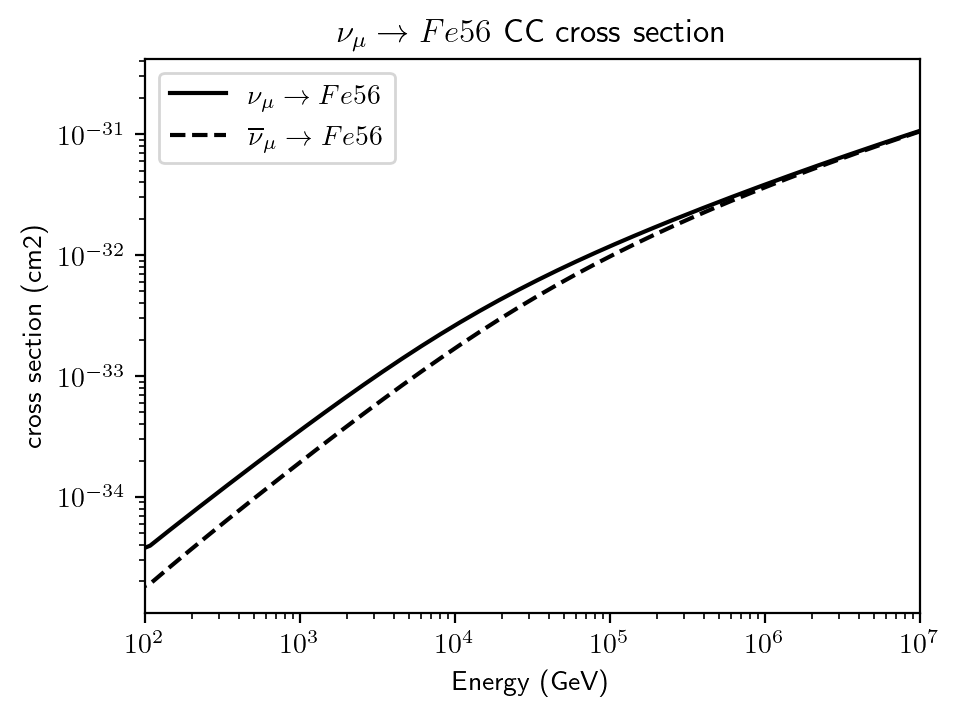

In [127]:
#sanity check: plot of total CC cross section for mu_nu -> N
plt.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(5, 3.6), dpi=200)
# plt.plot(cs_nu_mu_cc_n[:,0], cs_nu_mu_cc_n[:,1]*1e-38, label=r'$\nu_\mu \rightarrow n$')
# plt.plot(cs_nu_mu_cc_p[:,0], cs_nu_mu_cc_p[:,1]*1e-38, label=r'$\nu_\mu \rightarrow p$')
# plt.plot(cs_nu_mu_bar_cc_n[:,0], cs_nu_mu_bar_cc_n[:,1]*1e-38, label=r'$\overline{\nu}_\mu \rightarrow n$')
# plt.plot(cs_nu_mu_bar_cc_p[:,0], cs_nu_mu_bar_cc_p[:,1]*1e-38, label=r'$\overline{\nu}_\mu \rightarrow p$')
# plt.plot(cs_nu_mu_cc_n[:,0], get_cs_nu_mu_cc_Fe56(cs_nu_mu_cc_n[:,0]), label=r'$\nu_\mu \rightarrow Fe56$')
# plt.plot(cs_nu_mu_cc_n[:,0], get_cs_nu_mu_bar_cc_Fe56(cs_nu_mu_cc_n[:,0]), label=r'$\overline{\nu}_\mu \rightarrow Fe56$')
plt.plot(energy_array, SNe_2P_D0_01_s20.get_cs_nu_mu_cc_Fe56(energy_array), label=r'$\nu_\mu \rightarrow Fe56$', color='black')
plt.plot(energy_array, SNe_2P_D0_01_s20.get_cs_nu_mu_bar_cc_Fe56(energy_array), label=r'$\overline{\nu}_\mu \rightarrow Fe56$', color='black', linestyle='--')

plt.xlabel('Energy (GeV)')
plt.ylabel(r'cross section (cm2)')
plt.title(r'$\nu_\mu \rightarrow Fe56$ CC cross section')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlim(100,1e7)

In [ ]:
#sanity check: plot of flux from nuflux as a fcn of energy: 
plt.plot(np.arange(1.5,120,0.01), get_flux(np.arange(1.5,120,0.01),0))
plt.plot(np.arange(1.5,120,0.01), get_flux(np.arange(1.5,120,0.01),0,nu_type=nuflux.NuMuBar))
plt.xlim(0,10)
plt.xlabel('energy (GeV)')
plt.ylabel('flux @ cosZenith=1')

## Finding resultant energy distribution for reaction products

### Get the cross section data

In [3]:
file = uproot.open("dx_nuclcorr0_GHE19_00b_00_000.root")

In [4]:
file.keys()

['diffxsec_nu-14_tgt1000260560_CCHEDIS;1',
 'diffxsec_nu14_tgt1000260560_CCHEDIS;1',
 'diffxsec_nu-14_tgt1000822060_CCHEDIS;1',
 'diffxsec_nu14_tgt1000822060_CCHEDIS;1']

In [40]:
file = uproot.open("dx_nuclcorr0_GHE19_00b_00_000.root:diffxsec_nu14_tgt1000260560_CCHEDIS")

In [41]:
df = file.arrays(file.keys(), library="pd")

In [96]:
file_antinu = uproot.open("dx_nuclcorr0_GHE19_00b_00_000.root:diffxsec_nu-14_tgt1000260560_CCHEDIS")
df_antinu = file_antinu.arrays(file_antinu.keys(), library="pd")

### Verify the shape of the cross section curve

In [236]:
energy_axis = np.unique(np.asarray(df['Ei']))

In [237]:
Xsec = np.asarray([])

for energy in np.unique(np.asarray(df['Ei'])): 
    
    Xsec_energypoint = 0
    
    for nucleon in np.unique(np.asarray(df['Nucleon'])): 
        
        for quark in np.unique(np.asarray(df['Quark'])): 
        
            df_select = df[(df['Ei']==energy) & (df['Nucleon']==nucleon) & (df['Quark']==quark)]
            
            Y_array = np.asarray(df_select['By'])
            diffXsec_array = np.asarray(df_select['DiffXsec'])
                
            CS_energypoint = integrate_logspace(Y_array, diffXsec_array, 0, 1)
            
            Xsec_energypoint = Xsec_energypoint + integrate_logspace(Y_array, diffXsec_array, 0, 1)[0]
    
    Xsec = np.append(Xsec, Xsec_energypoint)

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_1505/613128352.py:7: RuntimeWarning: divide by zero encountered in log10
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)


(100, 10000000.0)

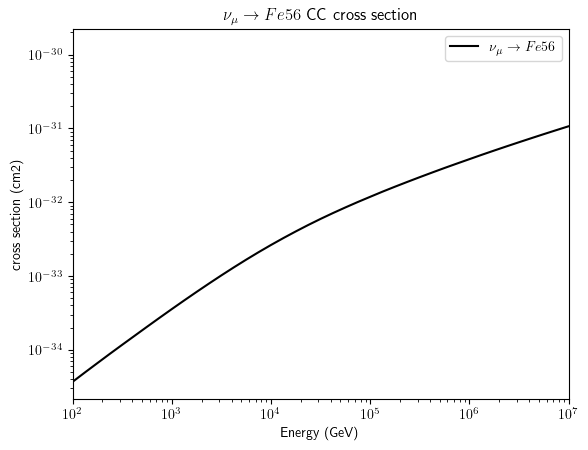

In [238]:
#plt.plot(energy_axis, Xsec_normal, label=r'$\nu_\mu \rightarrow Fe56$', color='black')
plt.plot(energy_axis, Xsec, label=r'$\nu_\mu \rightarrow Fe56$', color='black')
plt.xlabel('Energy (GeV)')
plt.ylabel(r'cross section (cm2)')
plt.title(r'$\nu_\mu \rightarrow Fe56$ CC cross section')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlim(100,1e7)

### Plot a bunch of curves for various energies

In [16]:
df_select = df[df['Ei'] == np.unique(np.asarray(df['Ei']))[56]]

In [50]:
np.unique(df['Quark'])

array([-40005, -40003, -40001, -20005, -20003, -20001,  10002,  10004,
        10006,  10102,  10104,  10106,  30002,  30004,  30006,  50002,
        50004,  50006], dtype=int32)

In [51]:
np.unique(df_antinu['Quark'])

array([-50006, -50004, -50002, -30006, -30004, -30002, -10006, -10004,
       -10002,  20001,  20003,  20005,  20101,  20103,  20105,  40001,
        40003,  40005], dtype=int32)

In [53]:
def get_DiffXsDist_atEnergy(energy, df): 
    
    df_select = df[df['Ei'] == energy]
    By_dist = np.unique(np.asarray(df_select['By']))
    
    quarkselection = np.unique(df['Quark'])[0]
    df_select2 = df[(df['Ei']==energy) & (df['Nucleon']==2212) & (df['Quark']==quarkselection)]
    Diff_Xsec_cumu = np.zeros(np.asarray(df_select2['DiffXsec']).shape)
    
    for nucleon in np.unique(np.asarray(df['Nucleon'])): 

        for quark in np.unique(np.asarray(df['Quark'])): 

            df_select = df[(df['Ei']==energy) & (df['Nucleon']==nucleon) & (df['Quark']==quark)]

            Xs_array = np.asarray(df_select['DiffXsec'])
            
            Diff_Xsec_cumu = np.add(Diff_Xsec_cumu, Xs_array)
            
    return By_dist, Diff_Xsec_cumu
    

In [156]:
testDiffXs = get_DiffXsDist_atEnergy(energy_axis[0])

In [105]:
indices = [0,16,32]
energy_axis = np.unique(np.asarray(df['Ei']))[indices]

Text(0.5, 1.0, '$\\nu_\\mu (\\overline{\\nu}_\\mu) + Fe56$ CC DIS')

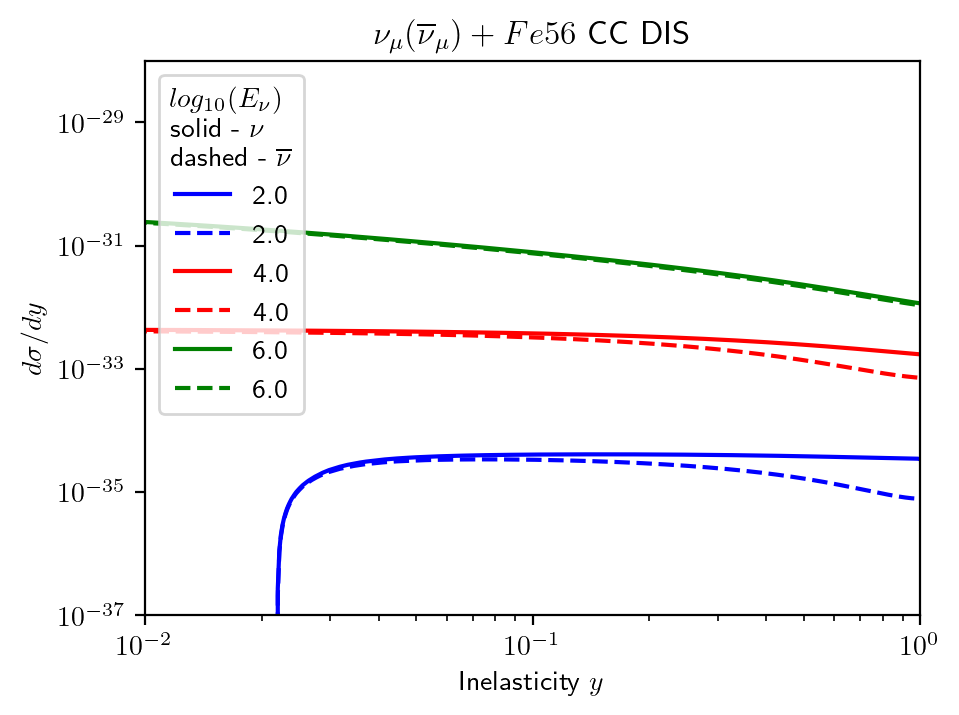

In [120]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)
colors = ['b', 'red', 'g']
cc = itertools.cycle(colors)

for energy in energy_axis: 
    c = next(cc)
    By, DiffXs = get_DiffXsDist_atEnergy(energy, df)
    plt.plot(By, DiffXs, label=str(np.log10(energy)), color=c)
    
    By, DiffXs = get_DiffXsDist_atEnergy(energy, df_antinu)
    plt.plot(By, DiffXs, label=str(np.log10(energy)), linestyle='--', color=c)
    
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 1)
plt.ylim(1e-37,1e-28)
plt.legend(title=r'$log_{10}(E_\nu)$ ' '\n' r'solid - $\nu$' '\n' r'dashed - $\overline{\nu}$', loc='upper left')
plt.xlabel('Inelasticity $y$')
plt.ylabel(r'$d\sigma / dy$')
plt.title(r'$\nu_\mu (\overline{\nu}_\mu) + Fe56$ CC DIS')

### Derive an average inelasticity at each energy point

In [54]:
avg_By = np.asarray([])
avg_By_antinu = np.asarray([])

for energy in np.unique(np.asarray(df['Ei'])): 
    By, DiffXs = get_DiffXsDist_atEnergy(energy, df)
    avg = integrate_logspace(By, DiffXs*By, 0.0000001, 1)[0] / integrate_logspace(By, DiffXs, 0.0000001, 1)[0]
    avg_By = np.append(avg_By, avg) 
    
for energy in np.unique(np.asarray(df_antinu['Ei'])):     
    By, DiffXs = get_DiffXsDist_atEnergy(energy, df_antinu)
    avg = integrate_logspace(By, DiffXs*By, 0.0000001, 1)[0] / integrate_logspace(By, DiffXs, 0.0000001, 1)[0]
    avg_By_antinu = np.append(avg_By_antinu, avg) 

Text(0.5, 1.0, 'CC DI scattering')

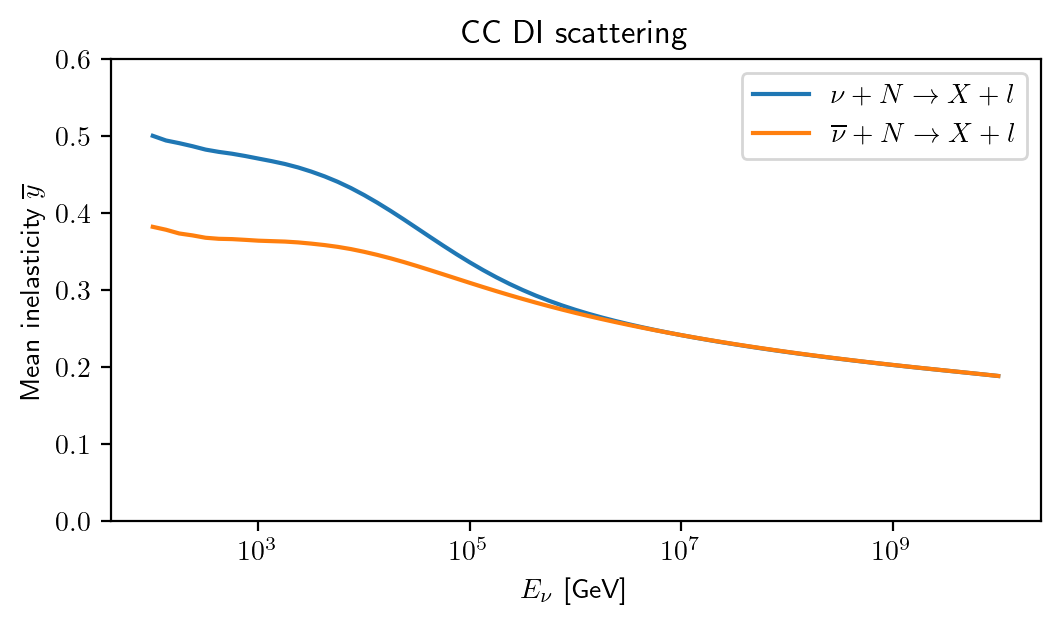

In [66]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(6, 3), dpi=200)

plt.plot(np.unique(np.asarray(df['Ei'])), avg_By, label=r'$\nu + N  \rightarrow X + l$')
plt.plot(np.unique(np.asarray(df['Ei'])), avg_By_antinu, label=r'$\overline{\nu} + N \rightarrow X + l$')
plt.xscale('log')
plt.ylim(0,0.6)
plt.ylabel(r'Mean inelasticity $\overline{y}$')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.legend()
plt.title('CC DI scattering')

In [251]:
energyaxis = np.unique(np.asarray(df['Ei']))

By_interp_nu = sp.interpolate.interp1d(np.log10(energyaxis), avg_By, kind='quadratic', fill_value="extrapolate")
By_interp_antinu = sp.interpolate.interp1d(np.log10(energyaxis), avg_By_antinu, kind='quadratic', fill_value="extrapolate")

In [252]:
energyaxis = np.logspace(np.log10(100), np.log10(1e7), num=100)

event_hist_2n_D1_0 = np.zeros(len(energyaxis)-1)

SNe_2n_D1_0 = make_SNeEvent(detMass=4e6,
                    distance=galaxy_dist,
                    flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs20.dat')

for i in range(len(energyaxis)-1): 
    event_hist_2n_D1_0[i] = SNe_2n_D1_0.get_eventNumber([energyaxis[i], energyaxis[i+1]])
#normalize 
event_hist_2n_D1_0 = event_hist_2n_D1_0 / np.sum(event_hist_2n_D1_0)

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_1505/1489766330.py:63: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  = sp.integrate.quad(self.get_dN_neutrino_dE_atEnergy, time_axis[0], time_axis[-1], args=(energy_index,),limit=10000)[0]


In [253]:
logenergyaxis_centers = (np.log10(energyaxis[1:]) + np.log10(energyaxis[:-1])) /2 

In [260]:
def random_custDist(x0,x1,custDist,size=None, nControl=10**6):
    #genearte a list of size random samples, obeying the distribution custDist
    #suggests random samples between x0 and x1 and accepts the suggestion with probability custDist(x)
    #custDist noes not need to be normalized. Add this condition to increase performance. 
    #Best performance for max_{x in [x0,x1]} custDist(x) = 1
    samples=[]
    nLoop=0
    while len(samples)<size and nLoop<nControl:
        x=np.random.uniform(low=x0,high=x1)
        prop=custDist(x)
        assert prop>=0 and prop<=1
        if np.random.uniform(low=0,high=1) <=prop:
            samples += [x]
        nLoop+=1
    return samples

energydist = sp.interpolate.interp1d(logenergyaxis_centers, event_hist_2n_D1_0, kind='quadratic', fill_value="extrapolate")
#call
x0=np.log10(100)
x1=np.log10(1e7)
def custDist(x):
    return energydist(x)
    
energysamples=random_custDist(x0,x1,custDist=custDist,size=500000)



Text(0.5, 1.0, 'MC collection of $\\nu_\\mu + \\overline{\\nu}_\\mu$ CC DIS starting events SNe IIn D=1.0')

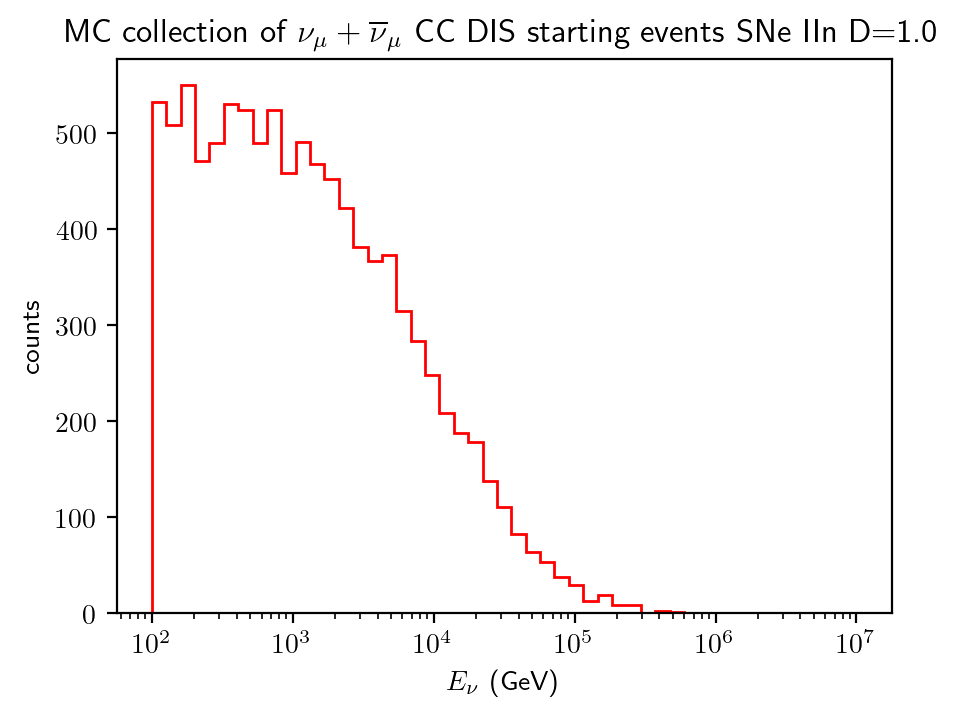

In [263]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

energyaxis = np.logspace(np.log10(100), np.log10(1e7), num=50)
plt.hist(np.power(10,energysamples), bins=energyaxis, histtype='step', color='red')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$E_{\nu}$ (GeV)')
plt.ylabel('counts')
plt.title(r'MC collection of $\nu_\mu + \overline{\nu}_\mu$ CC DIS starting events SNe IIn D=1.0')

In [264]:
X_energysamples_nu = By_interp_nu(energysamples) * np.power(10, energysamples)
X_energysamples_antinu = By_interp_antinu(energysamples) * np.power(10, energysamples)

l_energysamples_nu = (1-By_interp_nu(energysamples)) * np.power(10, energysamples)
l_energysamples_antinu = (1-By_interp_antinu(energysamples)) * np.power(10, energysamples)

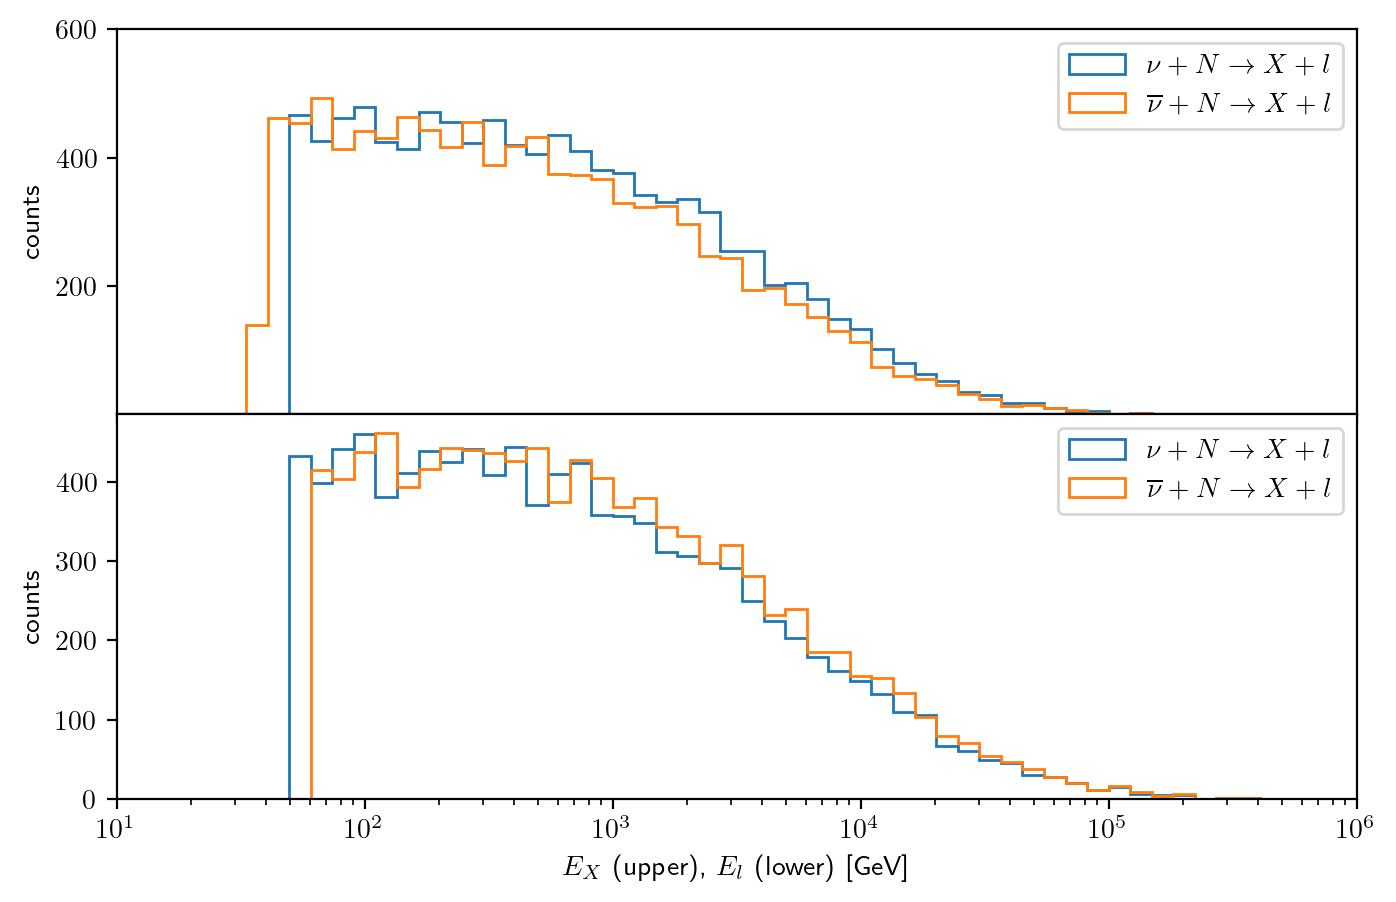

In [271]:
X_energyaxis = np.logspace(np.log10(10), np.log10(1e7), num=70)

plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5), dpi=200)
fig.subplots_adjust(hspace=0)

axs[0].hist(X_energysamples_nu, bins=X_energyaxis, histtype='step', label=r'$\nu + N  \rightarrow X + l$')
axs[0].hist(X_energysamples_antinu, bins=X_energyaxis, histtype='step', label=r'$\overline{\nu} + N  \rightarrow X + l$')
axs[0].set_xscale('log')
axs[0].set_xlabel(r'$E_{X}$ (GeV)')
axs[0].set_ylabel('counts')
axs[0].legend()
axs[0].set_xlim(0.1e2, 1e6)
axs[0].set_yticks(np.arange(200, 700, 200))

axs[1].hist(l_energysamples_nu, bins=X_energyaxis, histtype='step', label=r'$\nu + N  \rightarrow X + l$')
axs[1].hist(l_energysamples_antinu, bins=X_energyaxis, histtype='step', label=r'$\overline{\nu} + N  \rightarrow X + l$')
axs[1].set_xscale('log')
axs[1].set_xlabel(r'$E_X$ (upper), $E_{l}$ (lower) [GeV]')
axs[1].set_ylabel('counts')
axs[1].legend()
axs[1].set_xlim(0.1e2, 1e6)

plt.show()


## Muon resolution studies

In [31]:
def get_velocity(E, m0): 
    return 2.99792458e8 * np.sqrt(E**2 / (m0**2 + E**2))

In [32]:
get_velocity(100, 0.1)

299792308.1038834

In [76]:
def get_deflection(energy, restmass, return_sagitta=False): #energy, restmass must be in same units
    l=5.5 # typical path length thru toroid magnet in m
    v=get_velocity(energy, restmass) #velocity of muon given energy, in lab frame
    B=3 # toriod magnet field in T
    c= 2.99792458e8 #c in m/s
    gamma = 1/np.sqrt(1 - (v**2 /c**2)) #relativistic factor
    m0 = 1.8835e-28 #muon mass in kg
    t = l/v # time spend traversing magnetic field
    F = 1.6e-19 * v * B #lorentz force
    d = 0.5* F/(m0 * gamma) * t**2 # deflection
    
    r = (gamma*m0*v) / (1.6e-19*B)
    s = l**2 / (8*r)
    
    if return_sagitta:
        return s
    else:
        return d

In [53]:
d = 0.5* F/(m0 * gamma) * t**2 

In [81]:
get_deflection(1000,0.105,return_sagitta=True) * 1e6

3375.0452976996253

In [78]:
energies = np.logspace(1,5,1000)
deflections = get_deflection(energies, 0.105)
sagittas = get_deflection(energies, 0.105, return_sagitta=True)

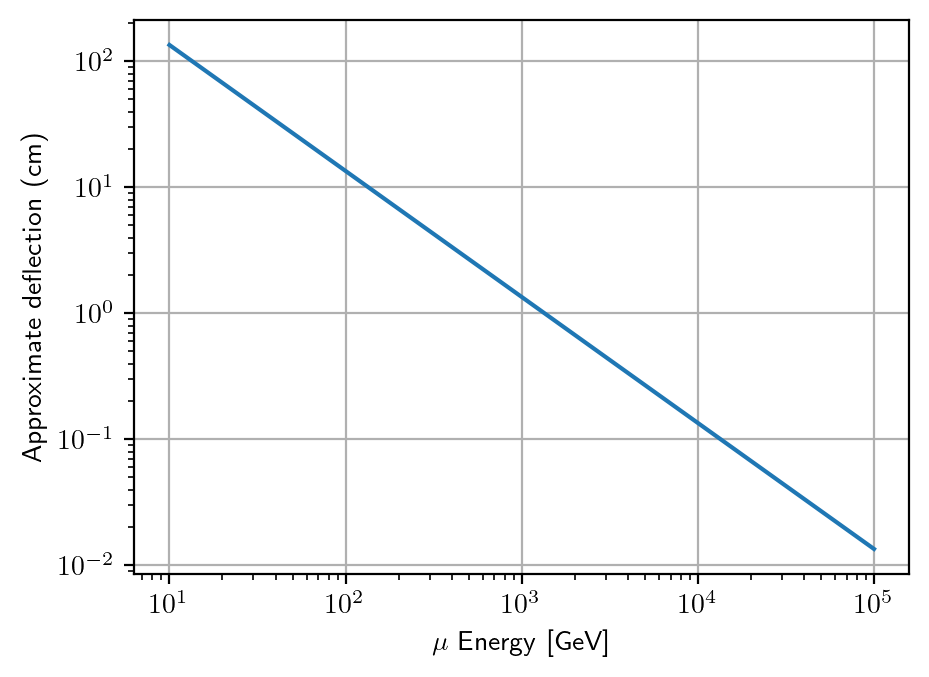

In [71]:
fig = plt.figure(figsize=(5, 3.6), dpi=200)
plt.plot(energies, deflections*100)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$ Energy [GeV]')
plt.ylabel('Approximate deflection (cm)')
plt.grid()

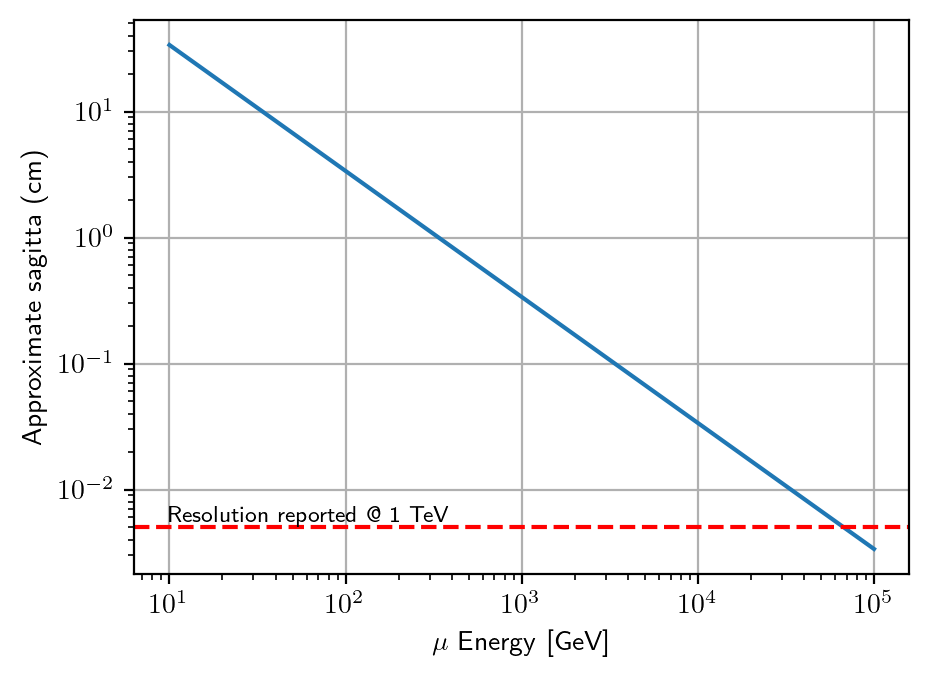

In [104]:
fig = plt.figure(figsize=(5, 3.6), dpi=200)
plt.plot(energies, sagittas*100)
plt.axhline(y=0.0050, color='r', linestyle='--')
plt.text(1e1, 0.0055,'Resolution reported @ 1 TeV', fontsize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$ Energy [GeV]')
plt.ylabel('Approximate sagitta (cm)')
plt.grid()